<a href="https://colab.research.google.com/github/ILPATHERA/ML2_Pokemoncreator/blob/main/ML2_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My Machine Learning 2 Image Classification Model

## Introduction

Welcome to this Jupyter Notebook, which focuses on the classification of Pokémon images using a machine learning model. In this project, we will utilize a Pokémon dataset to train an image classification model. The trained model will then be used to classify new Pokémon images.


## Dataset: Pokémon Images

Our dataset consists of a variety of Pokémon images, with each image associated with a specific Pokémon. The goal is to create a model capable of identifying these Pokémon based on their visual characteristics. We will divide the dataset into training and testing sets.

### Import Libraries

I could have included all imports which were used in one cell. However, since I like to be able to see in the respective cell which import is needed, I will import this in the respective cell.

### Load Data

I found the dataset on Kaggle. To use this directly, we need the API of Kaggle. In my GitHub repository there is a file called kaggle.json. Download it and upload it below.

Upload kaggle.json

In [37]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"simoneantoniosommer","key":"ccbbebbff4f40fa13f5b9024966cb78c"}'}

Setup Kaggle API

In [38]:
!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory

-rw-r--r-- 1 root root 75 Jun  7 18:23 kaggle.json
/content


Giving permission to file

In [39]:
!chmod 600 ~/.kaggle/kaggle.json

Now we check the connection to Kaggle. If the following is a list of datasets, then the connection to the Kaggle API has succeeded.

In [40]:
!kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          27506        774  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           1939         55  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           4484         93  1.0              
mohithsairamreddy/salary-data 

Now the dataset "pokemon-images-and-types" is downloaded, unzipped and saved to the current working directory of the Jupyter notebook. This dataset contains images of Pokémon along with their type information.

This is the dataset we will use in this Jupyter Notebook.

In [41]:
!kaggle datasets download -d vishalsubbiah/pokemon-images-and-types --force
!unzip /content/pokemon-images-and-types.zip


  0% 0.00/2.47M [00:00<?, ?B/s]
100% 2.47M/2.47M [00:00<00:00, 122MB/s]
Archive:  /content/pokemon-images-and-types.zip
replace images/images/abomasnow.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: images/images/abomasnow.png  
  inflating: images/images/abra.png  
  inflating: images/images/absol.png  
  inflating: images/images/accelgor.png  
  inflating: images/images/aegislash-blade.png  
  inflating: images/images/aerodactyl.png  
  inflating: images/images/aggron.png  
  inflating: images/images/aipom.png  
  inflating: images/images/alakazam.png  
  inflating: images/images/alomomola.png  
  inflating: images/images/altaria.png  
  inflating: images/images/amaura.png  
  inflating: images/images/ambipom.png  
  inflating: images/images/amoonguss.png  
  inflating: images/images/ampharos.png  
  inflating: images/images/anorith.png  
  inflating: images/images/araquanid.jpg  
  inflating: images/images/arbok.png  
  inflating: images/images/arcanine.png  
  inflating:

Our dataset consists of a CSV file and a folder with the images in JPG and PNG format. So that we can connect this accordingly, we add a column to the DF and deposit the respective path of the image.

In [42]:
import pandas as pd
from PIL import Image
from IPython.display import display
import os


#Create df
df = pd.read_csv('/content/pokemon.csv')

# Path to the images
image_folder = '/content/images/images'

# Create a dictionary to map image names to their corresponding paths
image_dict = {}
for file in os.listdir(image_folder):
    image_dict[os.path.splitext(file)[0]] = os.path.join(image_folder, file)

# Create a new column for the image path in the DataFrame
df['image_path'] = df['Name'].map(image_dict)

# Display the DataFrame
df.head()
#df.tail()


,Name,Type1,Type2,image_path
0,bulbasaur,Grass,Poison,/content/images/images/bulbasaur.png
1,ivysaur,Grass,Poison,/content/images/images/ivysaur.png
2,venusaur,Grass,Poison,/content/images/images/venusaur.png
3,charmander,Fire,NaN,/content/images/images/charmander.png
4,charmeleon,Fire,NaN,/content/images/images/charmeleon.png


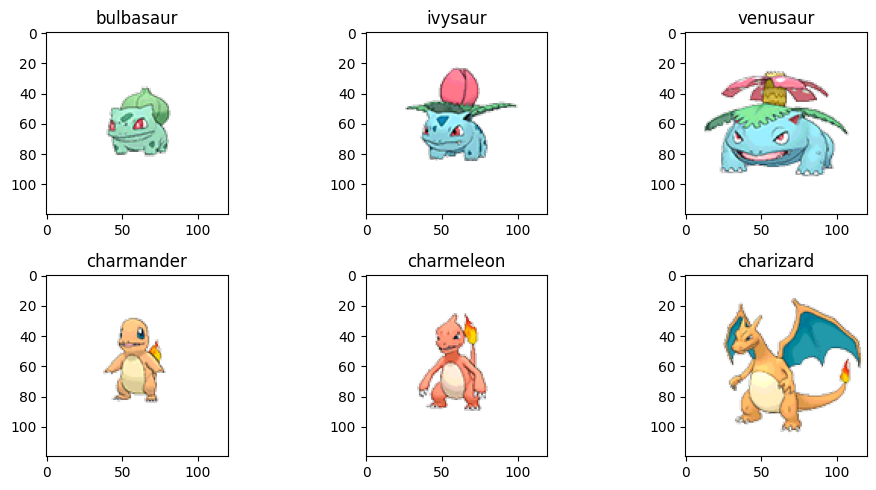

In [43]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Pfad zum Bild
image_folder = '/content/images/images'

# DataFrame erstellen (annimm, dass du bereits den DataFrame 'df' hast)

# Die ersten 6 Einträge im DataFrame auswählen
df_subset = df.head(6)

# Anzahl der Zeilen und Spalten für den Plot festlegen
num_rows = (len(df_subset) - 1) // 3 + 1
num_cols = min(len(df_subset), 3)

# Subplots erstellen
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))

# Iteriere über die Einträge und zeige die Bilder an
for i, ax in enumerate(axes.flat):
    if i < len(df_subset):
        image_name = df_subset.loc[i, 'Name']
        image_path = f'{image_folder}/{image_name}.png'

        # Bild laden
        img = mpimg.imread(image_path)

        # Bild im Plot anzeigen
        ax.imshow(img)
        ax.set_title(image_name)
      

plt.tight_layout()
plt.show()


Now, I would like to perform a detailed examination of my dataset. First and foremost, I want to determine the total number of entries and the number of columns present in the dataset. This information will provide an overview of the dataset's size and structure, allowing me to gain insights into its dimensions. Additionally, I am interested in identifying the names of all the columns in the dataset, which will help me understand the specific variables and attributes captured by the dataset.

In [44]:
# Determine the number of entries and columns in the dataset
num_entries = len(df)
num_columns = len(df.columns)
columns = df.columns
# Print the results
print("Number of entries:", num_entries)
print("Number of columns:", num_columns)
print("Colums:", columns)


Number of entries: 809
Number of columns: 4
Colums: Index(['Name', 'Type1', 'Type2', 'image_path'], dtype='object')


With the following function I now check if there are empty fields in my dataset. 


In [45]:
missing_values = df.isnull().sum()
print(missing_values)


Name            0
Type1           0
Type2         404
image_path      0
dtype: int64


Based on this value, I see that 404 fields are missing in the column "Type 2". After analyzing the mentioned fields, I see that this is not relevant, because there are Pokemons that do not necessarily have 2 types.

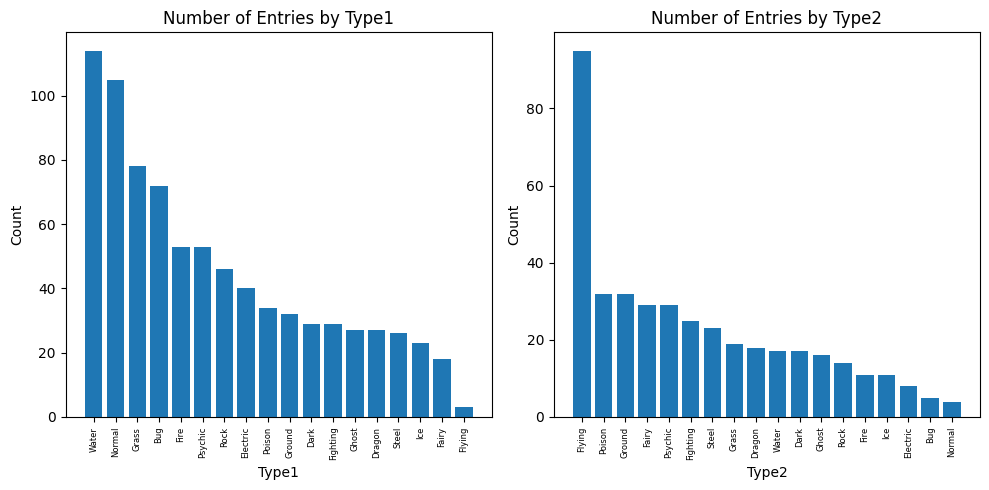

In [46]:
# Liste der Spaltennamen, für die Balkendiagramme erstellt werden sollen
columns = ['Type1', 'Type2']

# Anzahl der Subplots basierend auf der Anzahl der Spalten
num_subplots = len(columns)

# Anpassung der Größe der Subplots je nach Anzahl der Subplots
fig, axes = plt.subplots(1, num_subplots, figsize=(10, 5))

# Loop über die Spalten und erstelle Balkendiagramme
for i, column in enumerate(columns):
    # Zähle die Häufigkeit jedes Typs in der Spalte
    counts = df[column].value_counts()
    
    # Erstelle das Balkendiagramm
    ax = axes[i]
    ax.bar(counts.index, counts.values)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_title(f'Number of Entries by {column}')
    ax.tick_params(axis='x', rotation=90, labelsize=6)
    
# Subplots anpassen
plt.tight_layout()

# Diagramme anzeigen
plt.show()


### Transforming the Data

Now I will extend the CSV table by creating a column for all types. If the class applies, a 1 is filled in and if not a 0. 

In [47]:
import numpy as np

# Replace 'NaN' with 'None'
df['Type2'].replace('NaN', 'None', inplace=True)

#Create Column for each Type
all_types = set(df['Type1'].unique()).union(set(df['Type2'].unique()))

class_types = {}
for i, type_name in enumerate(all_types):
    class_types[type_name] = i

#Fill in 1 if pokemon has this type
for i, row in df.iterrows():
    type1 = row['Type1']
    type2 = row['Type2']
    for type_name in all_types:
        if type_name == type1 or type_name == type2:
            df.at[i, type_name] = 1
        else:
            df.at[i, type_name] = 0

df.head()


,Name,Type1,Type2,image_path,NaN,Fighting,Ghost,Normal,Dark,Ice,...,Dragon,Rock,Bug,Poison,Ground,Psychic,Electric,Grass,Steel,Water
0,bulbasaur,Grass,Poison,/content/images/images/bulbasaur.png,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,ivysaur,Grass,Poison,/content/images/images/ivysaur.png,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,venusaur,Grass,Poison,/content/images/images/venusaur.png,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,charmander,Fire,NaN,/content/images/images/charmander.png,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,charmeleon,Fire,NaN,/content/images/images/charmeleon.png,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In addition, a column is created for the values with "NaN" this, as well as Type1 and type2 I drop at this point, since these are no longer used.

In [48]:
#Replace nan with Type3 to drop column
columns = df.columns
columns = [col if not pd.isna(col) else 'Type3' for col in columns]

#Drop unused columns
df.columns = columns
df = df.drop(columns=['Type1', 'Type2','Type3'])
df.head()

,Name,image_path,Fighting,Ghost,Normal,Dark,Ice,Fire,Flying,Fairy,Dragon,Rock,Bug,Poison,Ground,Psychic,Electric,Grass,Steel,Water
0,bulbasaur,/content/images/images/bulbasaur.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,ivysaur,/content/images/images/ivysaur.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,venusaur,/content/images/images/venusaur.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,charmander,/content/images/images/charmander.png,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,charmeleon,/content/images/images/charmeleon.png,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating Custom Dataset and DataLoading

In [49]:
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm


# Lade die Bilder und erstelle das Trainingsset
train_images = []
train_labels = []
for i in tqdm(range(df.shape[0])):
    file_path = df['image_path'][i]
    if os.path.exists(file_path):
        img = load_img(file_path, target_size=(224, 224))  # Optional: Ändere die Größe der Bilder
        img = img_to_array(img)
        img = img / 255
        train_images.append(img)
        labels = df.iloc[i, 2:].values.astype(int)  # Annahme: Labels ab der dritten Spalte
        train_labels.append(labels)

X_train, X_temp, y_train, y_temp = train_test_split(np.array(train_images), np.array(train_labels), test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)  # 10% von X_temp für Validierung, 10% für Test



  0%|          | 0/809 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████| 809/809 [00:01<00:00, 576.86it/s]


## Visualizing the Results

In [50]:
print("TrainingSet: ", X_train.shape, y_train.shape)
print("ValidationSet: ", X_val.shape, y_val.shape)
print("TestSet: ", X_test.shape, y_test.shape)

TrainingSet:  (647, 224, 224, 3) (647, 18)
ValidationSet:  (141, 224, 224, 3) (141, 18)
TestSet:  (21, 224, 224, 3) (21, 18)


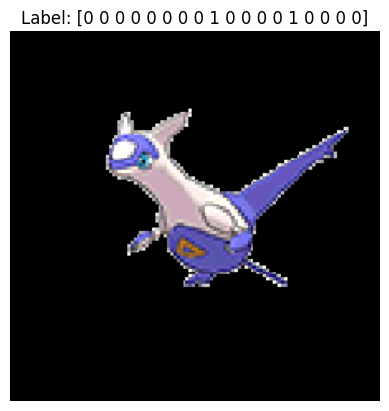

In [51]:
index = 553   # Index of image
image = X_train[index]
label = y_train[index]

#convert to the format of before
image = (image * 255).astype(np.uint8)

# Zeige das Bild an
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Label: " + str(label))
plt.axis("off")
plt.show()


## Model

Lets create a Model

In [65]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import layers


model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(128, kernel_size=4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(y_train.shape[1], activation='softmax'))


In [66]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 26, 26, 128)     

In [67]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=64)

Epoch 1/10
11/11 [==============================] - 78s 7s/step - loss: 8.3696 - accuracy: 0.0726 - val_loss: 51.8314 - val_accuracy: 0.0638
Epoch 2/10
11/11 [==============================] - 76s 7s/step - loss: 1217.6182 - accuracy: 0.0665 - val_loss: 5282.0605 - val_accuracy: 0.0638
Epoch 3/10
11/11 [==============================] - 75s 7s/step - loss: 16895.0840 - accuracy: 0.1082 - val_loss: 78330.5781 - val_accuracy: 0.0780
Epoch 4/10
11/11 [==============================] - 74s 7s/step - loss: 200917.3438 - accuracy: 0.0773 - val_loss: 815447.5000 - val_accuracy: 0.0851
Epoch 5/10
11/11 [==============================] - 75s 7s/step - loss: 1198447.8750 - accuracy: 0.0989 - val_loss: 3989447.2500 - val_accuracy: 0.0426
Epoch 6/10
11/11 [==============================] - 75s 7s/step - loss: 6304473.0000 - accuracy: 0.0726 - val_loss: 14402752.0000 - val_accuracy: 0.0709
Epoch 7/10
11/11 [==============================] - 75s 7s/step - loss: 29328714.0000 - accuracy: 0.0757 - val

1/1 [==============================] - 0s 77ms/step
[[0.06039404 0.0550289  0.07551055 0.04557947 0.03001418 0.05529509
  0.07498817 0.04441492 0.01232843 0.036814   0.08305039 0.07272812
  0.04887132 0.05824763 0.04942432 0.07661142 0.03629594 0.08440323]]
Steel (0.0844)
Rock (0.0831)
Electric (0.0766)


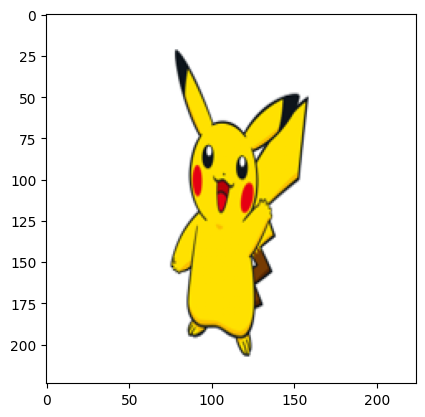

In [63]:
from PIL import Image
import numpy as np

image_path = '/content/country_detail_pokemon.png'
img = Image.open(image_path)
img = img.resize((224, 224))  # Ändere die Größe des Bildes auf (224, 224)

# Überprüfe, ob das Bild einen Alpha-Kanal enthält und entferne ihn falls vorhanden
if img.mode == 'RGBA':
    img = img.convert('RGB')

img = img_to_array(img)
img = img / 255

classes = np.array(df.columns[1:])
proba = model.predict(np.expand_dims(img, axis=0))  # Füge eine zusätzliche Dimension hinzu
print(proba)
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]]) + " ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)


### Defining Layers

### Training

## Model Training

For the classification of Pokémon images, we will employ a Convolutional Neural Network (CNN). CNNs are particularly well-suited for detecting visual patterns in images. We will train the CNN model using the training dataset. During the training process, the model's weights will be adjusted to learn the visual features of the different Pokémon.

## Model Evaluation

Once the model has been trained, it is crucial to assess its performance. We will test the trained model on the